# Filtro Wiener - Predictor Lineal

In [26]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '12'

Text(0.5, 1.0, 'Señal detectada $x[n]$')

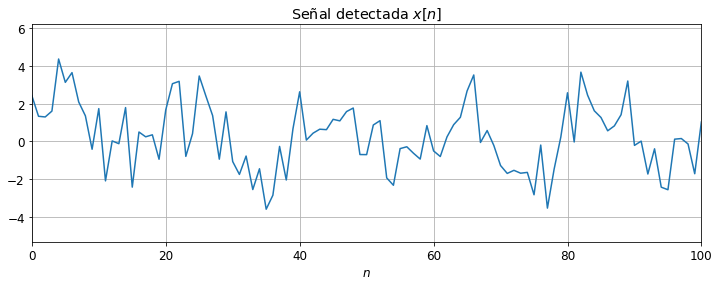

In [27]:
# Wiener filter - Predictor Lineal
N = 1000

# Señal deseada senoidal
n = np.arange(N)
phi = 0.2
d = 2*np.sin(0.1*np.pi*n + phi)

# Ruido blanco
sigv = np.sqrt(2)
w = sigv*np.random.randn(N)

x = d+w

plt.figure(figsize=[12,4])
plt.plot(x)
plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal detectada $x[n]$')


Error medio cuadrático:  0.3406565999460167


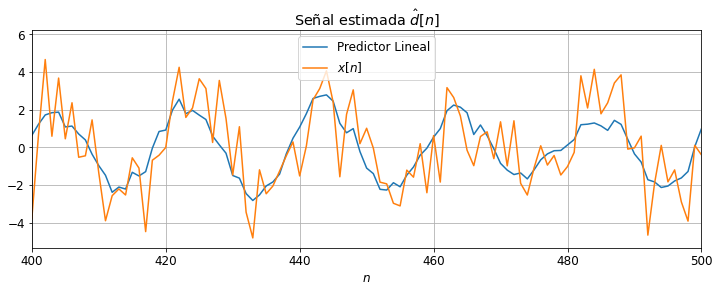

In [32]:
# Utilizando los datos para calcular las correlaciones (Predictivo)

P = 21

# Matriz Rx[i,j] = rx[i-j]
rx = np.zeros(P)
for i in range(P):
    rx[i] = np.mean(x[0:N-i]*x[i:N])
    
Rx = np.zeros((P,P))
for i in range(P):
    for j in range(P):
        Rx[i,j] = rx[np.abs(i-j)]

# Vector rdx[i] = rx[i+1]
rdx = np.zeros(P)
for i in range(P):
    rdx[i] = np.mean(x[0:N-(i+1)]*x[(i+1):N])

# Calculando Filtro Wiener
H1 = np.dot(np.linalg.inv(Rx),rdx)
dH1 = signal.lfilter(H1,[1],x)

plt.figure(figsize=[12,4])
plt.plot(dH1)
plt.plot(x)
#plt.plot(d)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.xlim([400,500])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Predictor Lineal','$x[n]$'])

print('Error medio cuadrático: ',np.mean((d-dH1)**2))


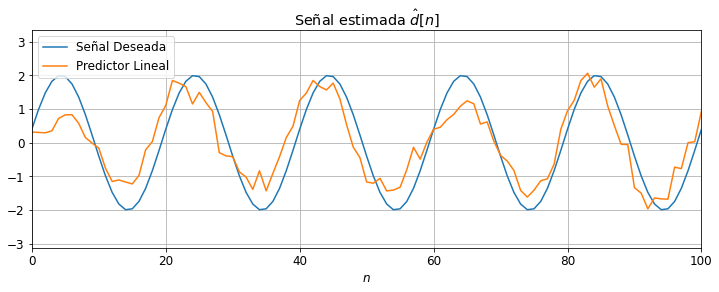

In [37]:
# Comparando Predicción Lineal y señal deseada

plt.figure(figsize=[12,4])
plt.plot(d)
plt.plot(dH1)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
#plt.xlim([400,500])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Señal Deseada','Predictor Lineal'])


Error medio cuadrático:  1.9535413631156118


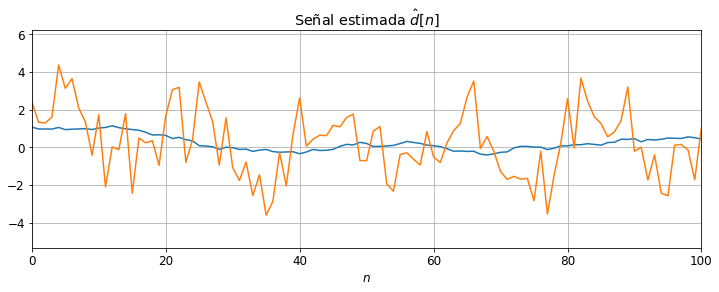

In [38]:
# Comparando con la función signal.wiener
dH2 = signal.wiener(x,mysize=P)

plt.figure(figsize=[12,4])
plt.plot(dH2)
plt.plot(x)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')

print('Error medio cuadrático: ',np.mean((d-dH2)**2))


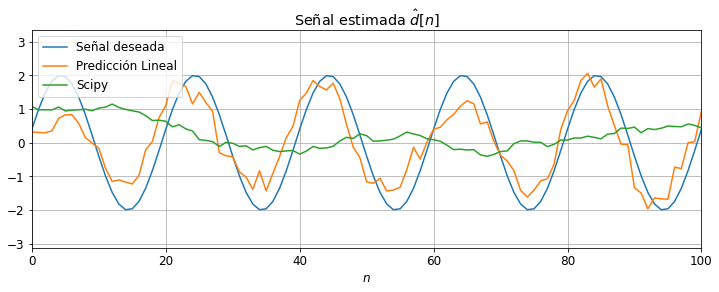

In [39]:
plt.figure(figsize=[12,4])
plt.plot(d)
plt.plot(dH1)
plt.plot(dH2)

plt.grid('on')
plt.xlabel('$n$')
plt.xlim([0,100])
plt.title('Señal estimada $\hat{d}[n]$')
plt.legend(['Señal deseada','Predicción Lineal','Scipy'])
